In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 9500.

beam_params = {
    'photonEnergy': E0,
    'cx': 0e-6,
    'cy': 0e-6,
    'ax': 0.e-6,
    'ay': 0e-6,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 10
}

In [11]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

crystal = optics.Crystal('c1', hkl=[2,2,0], length=2e-2, z=790, E0=9500,alphaAsym=5*np.pi/180)
crystal2 = optics.Crystal('c1', hkl=[2,2,0], length=2e-2, z=791, E0=9500,alphaAsym=5*np.pi/180, 
                          asym_type='emergence', orientation=0)
crystal3 = optics.Crystal('c1', hkl=[2,2,0], length=2e-2, z=791, E0=9500,alphaAsym=5*np.pi/180, 
                          asym_type='emergence', orientation=2)

crystal4 = optics.Crystal('c1', hkl=[2,2,0], length=2e-2, z=791, E0=9500,alphaAsym=0*np.pi/180, 
                          orientation=2)
crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=2e-2, z=791, E0=9500,alphaAsym=0*np.pi/180, 
                          orientation=0)
print(crystal.alpha*180/np.pi)
print(crystal.beta0*180/np.pi)
print(np.sin(crystal.beta0)/np.sin(crystal.alpha))
print(crystal2.alpha*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=5e-6, z=800.344434)

upstream_YAG = optics.PPM('YAG1',FOV=2e-3,z=800.02 + 1e-3, N=256)
downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [mr1l0,mr2l0,downstream_YAG, upstream_YAG, crystal2,crystal3]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

FWHM in x: 359.96166222443094 microns
FWHM in y: 359.96166222443094 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415460266851334
5.415460266851334
x is focused
y is focused
14.868942263472029
24.86894226347203
1.638852135363392
24.86894226347203


mr1l0
zy: 110.00
drift1
zy: 117.29
mr2l0
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zy: 161.00
c1
zy: 161.00
c1
zy: 161.00
drift3
zy: 161.00
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zy: 170.02
YAG1
zy: 170.02
drift5
x stays unfocused
y remains focused
zy: 173.00
YAG
zy: 173.00


<IPython.core.display.Javascript object>


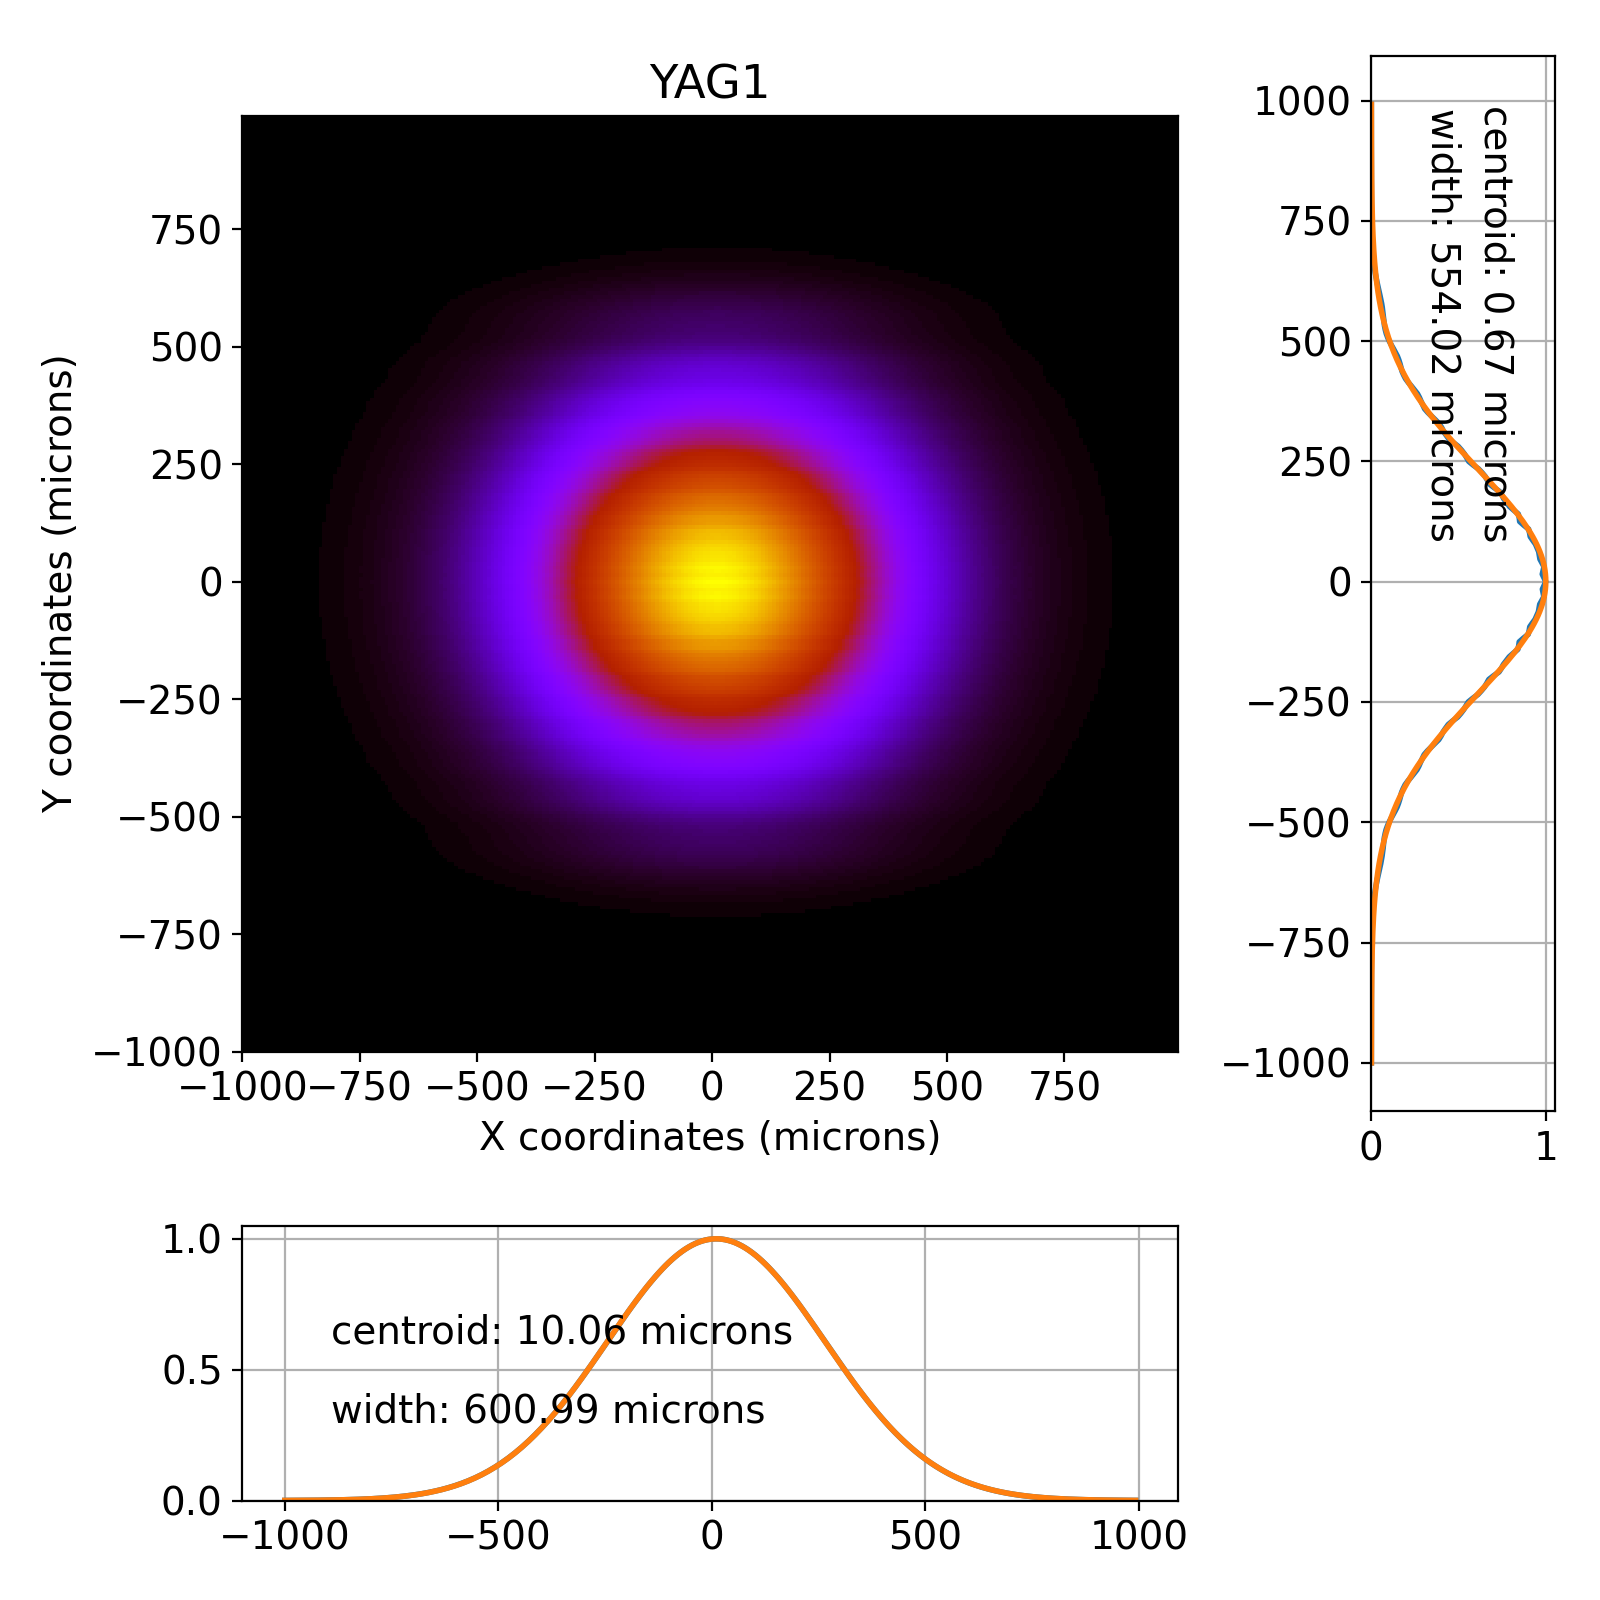

<IPython.core.display.Javascript object>


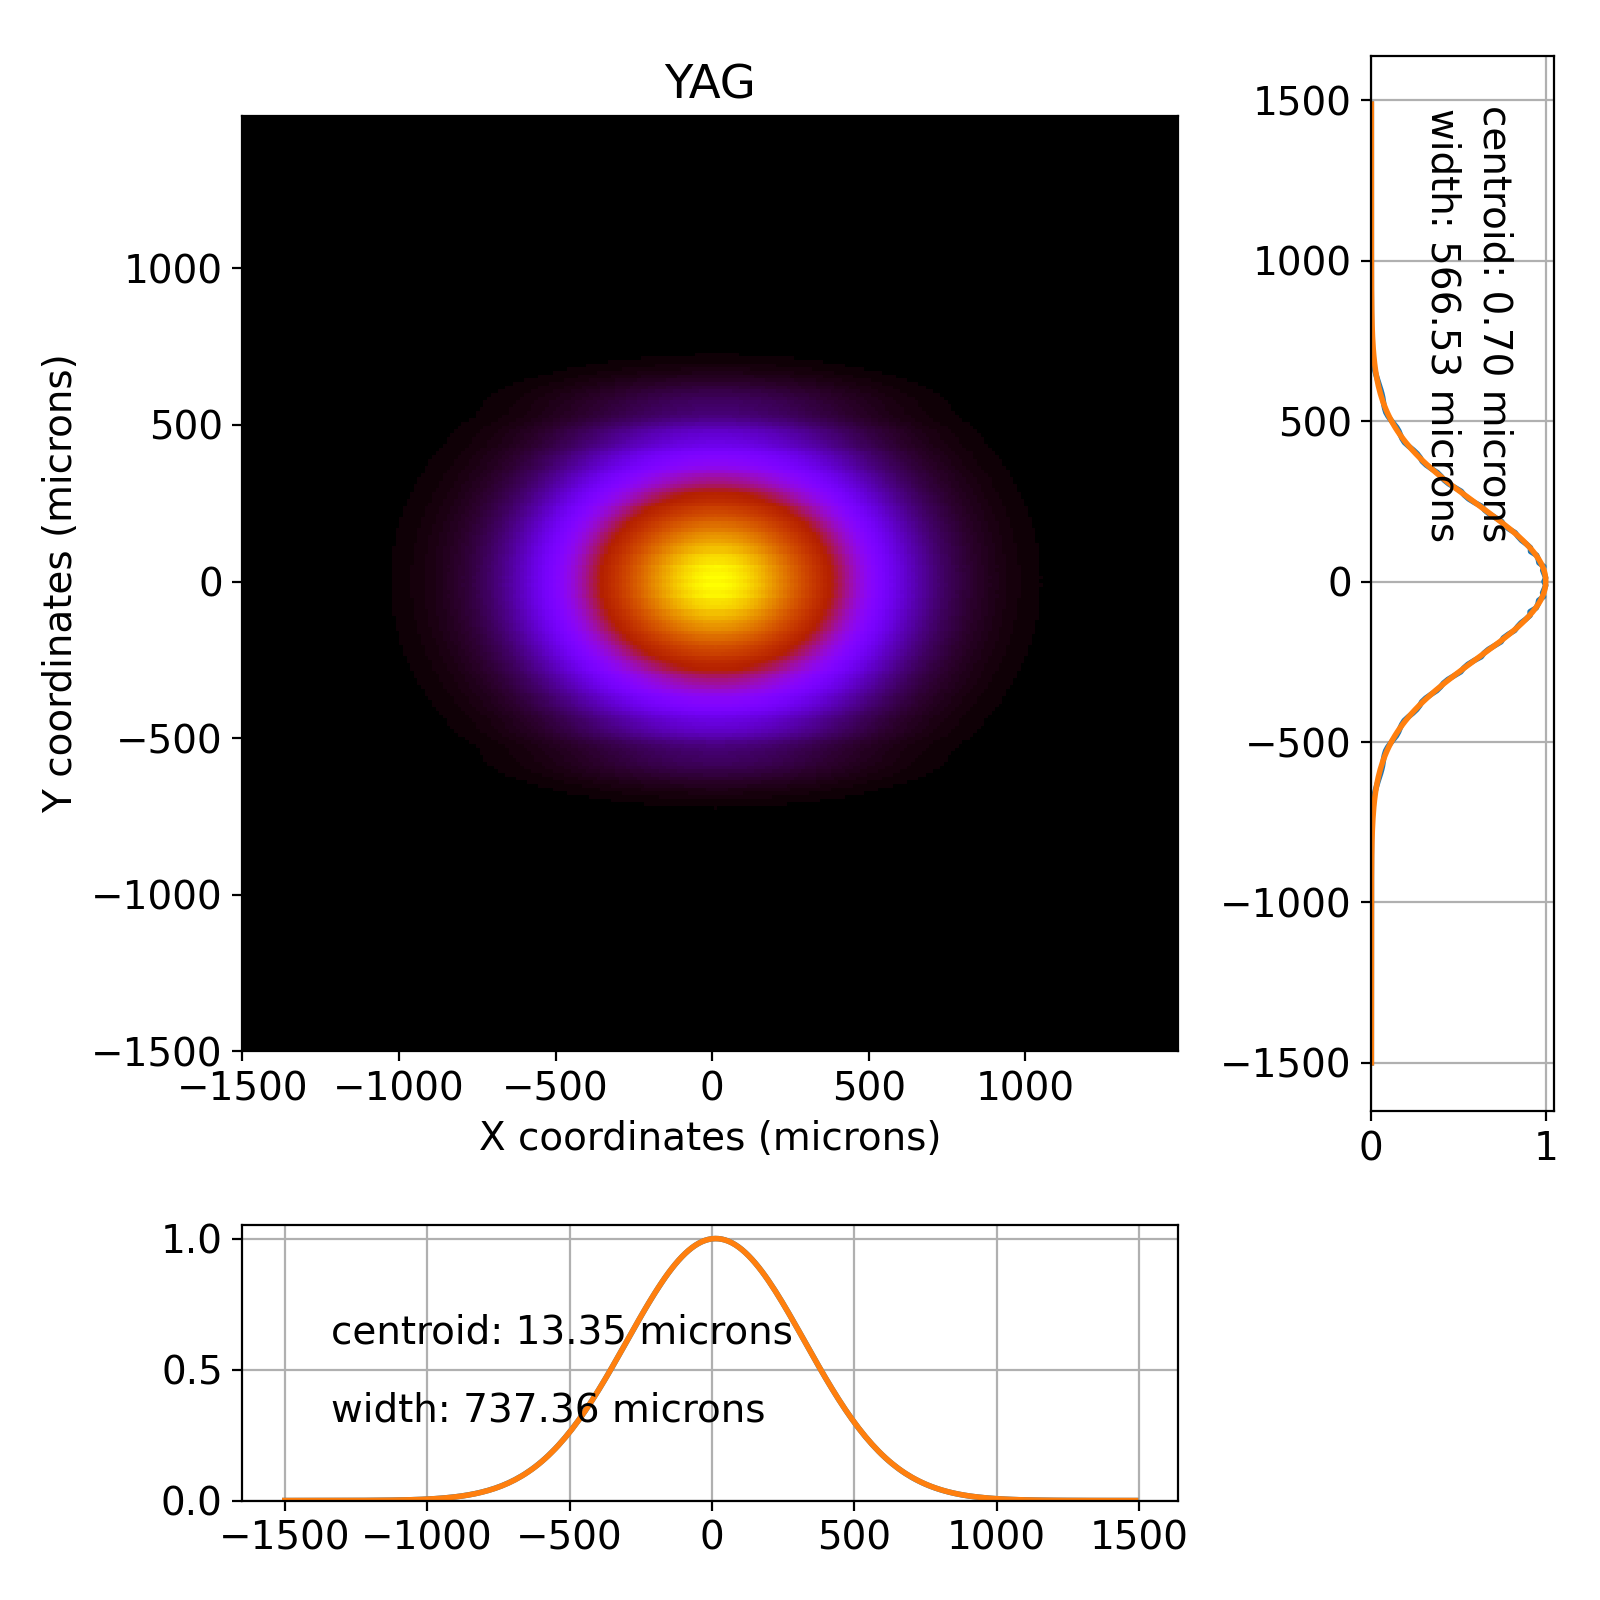

In [12]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG.view_beam()

In [13]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=200, time_window=2000)

In [14]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG','YAG1'])

FWHM in x: 359.9634198211114 microns
FWHM in y: 359.9634198211114 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415433760645733
5.415433760645733
x is focused
y is focused
mr1l0
zy: 110.00
drift1
zy: 117.29
mr2l0
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zy: 161.00
c1
zy: 161.00
c1
zy: 161.00
drift3
zy: 161.00
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zy: 170.02
YAG1
zy: 170.02
drift5
x stays unfocused
y remains focused
zy: 173.00
YAG
zy: 173.00
FWHM in x: 359.9633361256408 microns
FWHM in y: 359.9633361256408 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415435022846
5.415435022846
x is focused
y is focused
mr1l0
zy: 110.00
drift1
zy: 117.29
mr2l0
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zy: 161.00
c1
zy: 161.00
c1
zy: 161.00
drift3
zy: 161.00
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zy: 170.02
YAG1
zy: 170.02
drift5
x stays unfocu

zy: 161.00
c1
zy: 161.00
drift3
zy: 161.00
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zy: 170.02
YAG1
zy: 170.02
drift5
x stays unfocused
y remains focused
zy: 173.00
YAG
zy: 173.00
FWHM in x: 359.96208069826855 microns
FWHM in y: 359.96208069826855 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415453955850001
5.415453955850001
x is focused
y is focused
mr1l0
zy: 110.00
drift1
zy: 117.29
mr2l0
zy: 117.29
drift2
x becomes unfocused
y becomes unfocused
zy: 161.00
c1
zy: 161.00
c1
zy: 161.00
drift3
zy: 161.00
drift4
x stays unfocused
y becomes focused
x stays unfocused
y remains focused
zy: 170.02
YAG1
zy: 170.02
drift5
x stays unfocused
y remains focused
zy: 173.00
YAG
zy: 173.00
FWHM in x: 359.96199700342294 microns
FWHM in y: 359.96199700342294 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415455218050268
5.415455218050268
x is focused
y is focused
mr1l0
zy: 110.00
drift1
zy: 117.29
mr2l0
zy: 117.29
dri

<IPython.core.display.Javascript object>


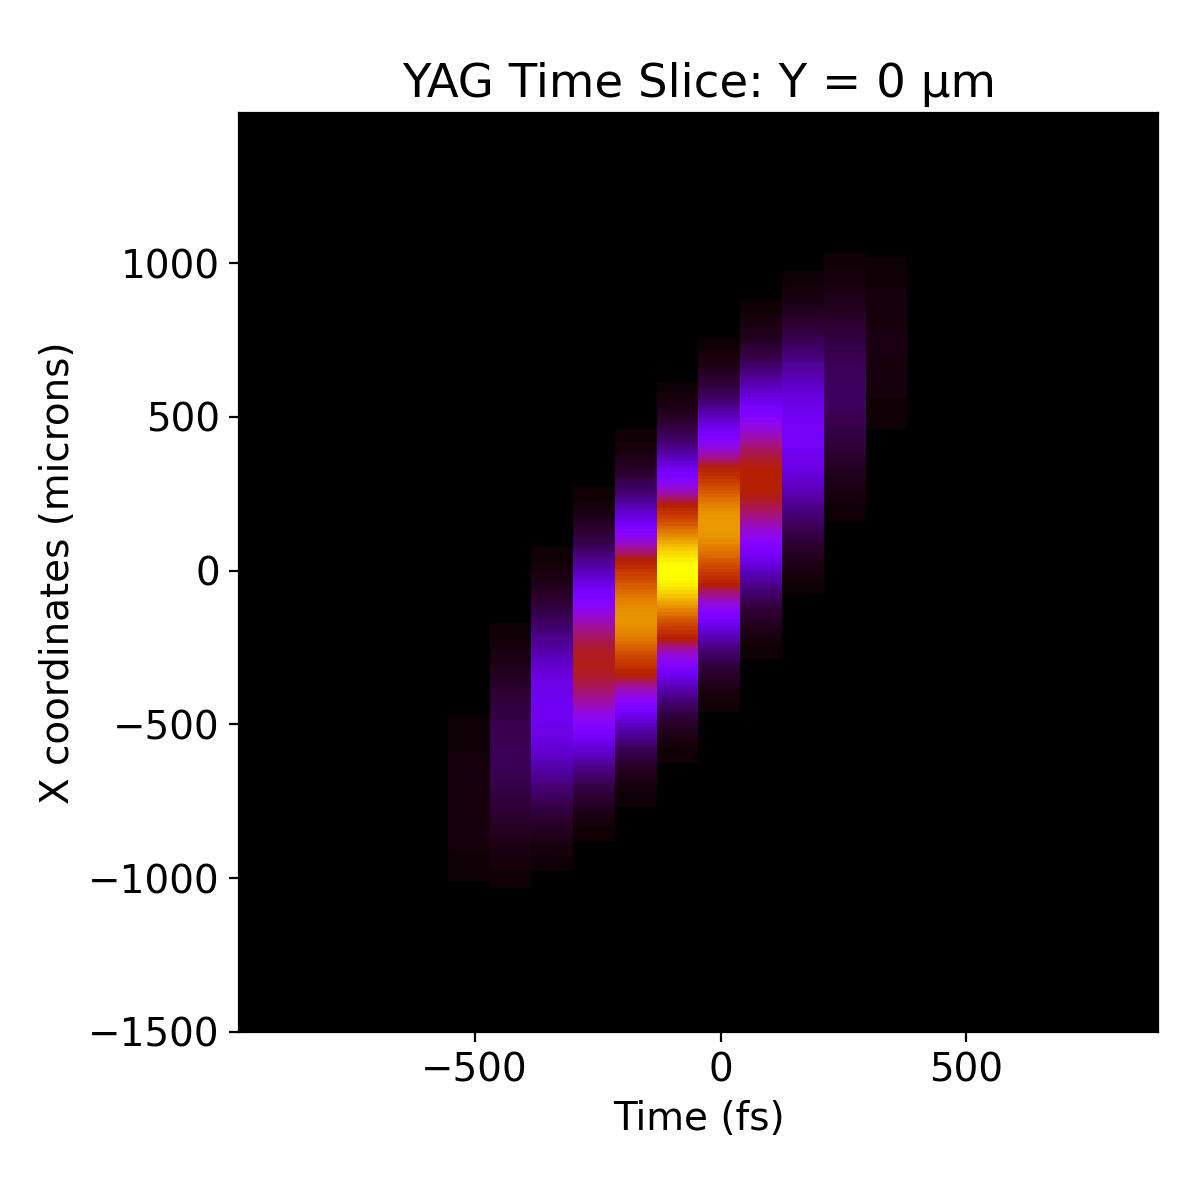

128


In [15]:
pulse_test.imshow_time_slice('YAG')

In [13]:
170/400

0.425

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666